In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data,index=['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [3]:
df.max() #컬럼별  max

eng     70
kor     80
math    90
dtype: int64

In [6]:
df.max(axis=1) #row별

a    90
b    50
c    60
d    80
dtype: int64

In [9]:
sr = df.max()
sr.max()

90

In [7]:
df.max().max()

90

In [10]:
df.unstack() #2차원을 1차원 시리즈로 변경

eng   a    10
      b    30
      c    50
      d    70
kor   a    20
      b    40
      c    60
      d    80
math  a    90
      b    50
      c    20
      d    70
dtype: int64

In [12]:
df.unstack().index

MultiIndex([( 'eng', 'a'),
            ( 'eng', 'b'),
            ( 'eng', 'c'),
            ( 'eng', 'd'),
            ( 'kor', 'a'),
            ( 'kor', 'b'),
            ( 'kor', 'c'),
            ( 'kor', 'd'),
            ('math', 'a'),
            ('math', 'b'),
            ('math', 'c'),
            ('math', 'd')],
           )

In [11]:
df.unstack().max()

90

In [13]:
df.sum()

eng     160
kor     200
math    230
dtype: int64

In [15]:
df.sum(axis=1)

a    120
b    120
c    130
d    220
dtype: int64

In [17]:
df.sum().sum()

590

In [18]:
df.mean()

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [19]:
df.mean(axis=1)

a    40.000000
b    40.000000
c    43.333333
d    73.333333
dtype: float64

In [20]:
df.median()

eng     40.0
kor     50.0
math    60.0
dtype: float64

In [21]:
df.std()

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [22]:
df.quantile( [0.25,0.5,0.75])

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [23]:
df.count()

eng     4
kor     4
math    4
dtype: int64

In [24]:
df.describe()

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [26]:
df.index.name = '이름'

In [28]:
df.to_excel('a.xlsx')

In [33]:
def fn(v):
    return v.sum()
#     print('v=',v)
#     print("=======")
#     return v

In [30]:
df.apply( fn )

v= 이름
a    10
b    30
c    50
d    70
Name: eng, dtype: int64
v= 이름
a    10
b    30
c    50
d    70
Name: eng, dtype: int64
v= 이름
a    20
b    40
c    60
d    80
Name: kor, dtype: int64
v= 이름
a    90
b    50
c    20
d    70
Name: math, dtype: int64


,eng,kor,math
이름,,,
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [31]:
df.apply( fn,axis=1 )

v= eng     10
kor     20
math    90
Name: a, dtype: int64
v= eng     10
kor     20
math    90
Name: a, dtype: int64
v= eng     30
kor     40
math    50
Name: b, dtype: int64
v= eng     50
kor     60
math    20
Name: c, dtype: int64
v= eng     70
kor     80
math    70
Name: d, dtype: int64


,eng,kor,math
이름,,,
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [34]:
df.apply( fn )

eng     160
kor     200
math    230
dtype: int64

In [ ]:
df.apply( fn )

In [35]:
df.apply( lambda v: v.sum() )

eng     160
kor     200
math    230
dtype: int64

In [36]:
df.apply( lambda v: v['a'] )

eng     10
kor     20
math    90
dtype: int64

In [ ]:
#국어,영어,수학점수의 평균이 70점이상이면
# '합격' 아니면 '불합격'  시리즈를 구하시요.

In [38]:
df.apply(lambda v: '합격' if v.mean()>=70 else '불합격',axis=1)

이름
a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [39]:
df['결과'] = df.apply(lambda v: '합격' if v.mean()>=70 else '불합격',axis=1)

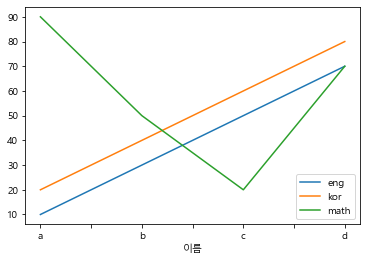

In [43]:
df.plot()
plt.show()

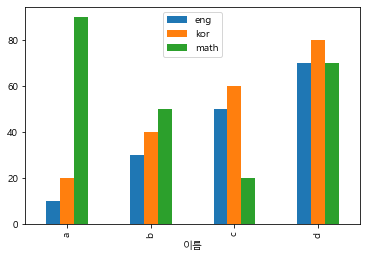

In [44]:
df.plot(kind='bar')
plt.show()

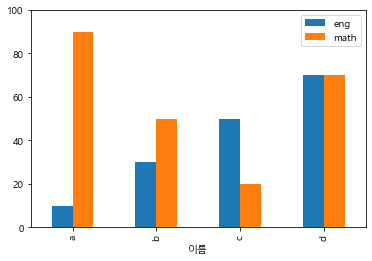

In [46]:
df.plot(kind='bar',y=['eng','math'],ylim=(0,100) ) #x='kor'
plt.show()

In [40]:
df

,eng,kor,math,결과
이름,,,,
a,10,20,90,불합격
b,30,40,50,불합격
c,50,60,20,불합격
d,70,80,70,합격
